# Módulo 10 atividade 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df = df.drop(['index','Unnamed: 0','mau'] ,axis=1)

In [4]:
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


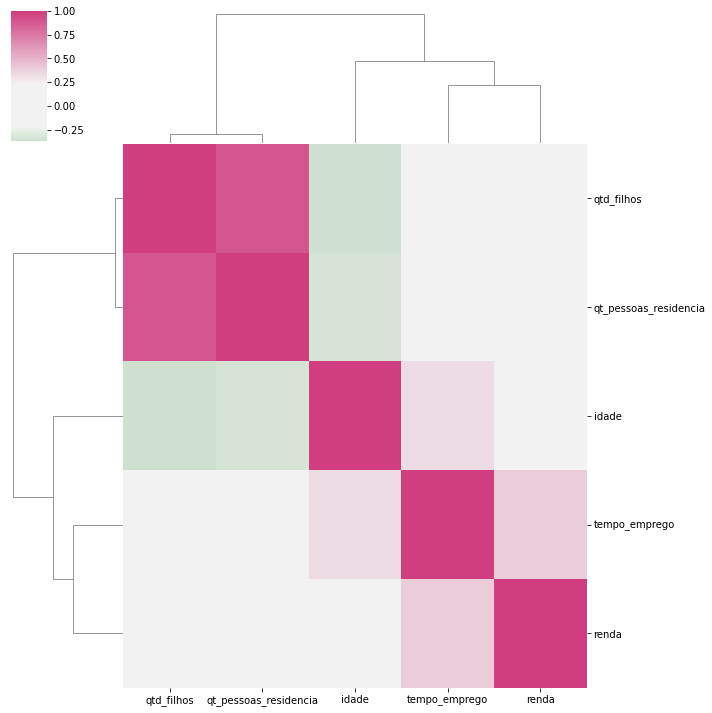

In [5]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light' )
sns.clustermap(df[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']].corr(), figsize=(10,10), center=0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='idade'>

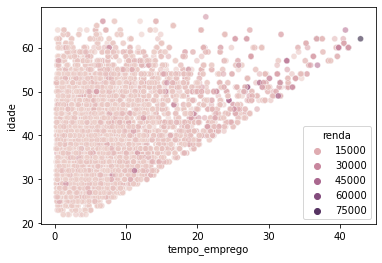

In [14]:
sns.scatterplot(x='tempo_emprego',y='idade',data=df,hue='renda',alpha=.6)

3) Na su aopinião, há outliers na variável renda?

<AxesSubplot:>

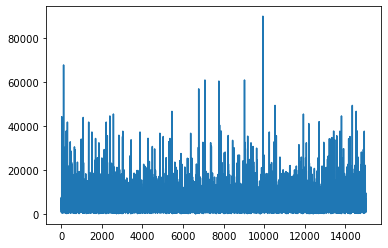

In [20]:
df['renda'].plot()

In [18]:
df[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']].describe().T

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,15000.0,0.437267,0.760594,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.841400,11.229170,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12466.0,7.750462,6.780216,0.191781,3.016438,6.016438,10.183562,42.906849
qt_pessoas_residencia,15000.0,2.219067,0.922352,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,4624.632946,4628.571729,159.900000,1945.740000,3278.260000,5642.365000,89918.040000


    Na minha opinião existem outliers na variável renda, podemos observar isso no gráfico e também no describe,
    olhando para a média vemos valores muito abaixo no min e max, e avaliando os quartis podemos realmente confirmar
    que estão fora da realidade da maioria

    

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [23]:
df['log_renda'] = np.log(df['renda'])

<AxesSubplot:>

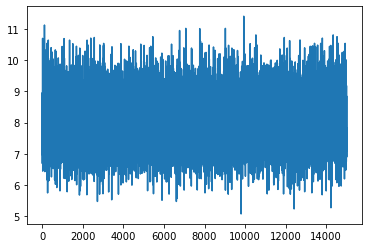

In [28]:
df['log_renda'].plot()

In [29]:
df[['renda','log_renda']].describe().T

,count,mean,std,min,25%,50%,75%,max
renda,15000.0,4624.632946,4628.571729,159.900000,1945.740000,3278.260000,5642.365000,89918.040000
log_renda,15000.0,8.111047,0.797451,5.074549,7.573398,8.095068,8.638059,11.406654


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Creio que melhorou, deixando os valores em padrões semelhantes, só temos que tomar cuidado para não deixa-la muito homogenea, observando o desvio-padrão podemos notar a diferença gigantesca em fazer o log da renda